In [2]:
# This pipeline includes the functions S_AB_exc and S_AB_inh, and compares their outputs  
# with those of Cosine and Pearson similarity measures. These comparisons are demonstrated  
# using hypothetical examples presented in the appendix of the accompanying paper.  

# The functions S_AB_exc (excitatory) and S_AB_inh (inhibitory) return the Functional Connectivity Network (FCN)  
# based on inducing action potentials, as described in Equation A.6 of the paper.  

# This implementation is not optimized for speed and is designed primarily for pedagogical purpose

In [19]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from numpy.linalg import norm
from numpy import dot


def S_AB_exc(A_index,B_index,tau):
    
    T=max(A_index[-1],B_index[-1])+1
    N_AB=max(len(A_index),len(B_index))
#     print(T)
    A=[int(i in A_index) for i in range(T)]
    B=[int(i in B_index) for i in range(T)]
#     print(A)
    f_A=[]
    A_last=-1000
    for i in range(len(A)):
        if A[i]!=0:
            A_last=i
        f_A.append(np.exp((A_last-i)/tau))
#     plt.plot(f_A)
    f_A_ave=np.sum(f_A)/T
#     print(f_A_ave)
    f_A_tilde=[(i-f_A_ave)/(1-f_A_ave) for i in f_A]
    F_AB=dot(f_A_tilde,B)/N_AB
#     F_AB=dot(f_A,B)/N_AB
#     plt.plot(f_A)
#     plt.plot(f_A_tilde)
    S_AB=max(F_AB,0)
    return f_A, f_A_tilde, S_AB 


def S_AB_inh(A_index,B_index,tau):
    
    T=max(A_index[-1],B_index[-1])+1
    N_AB=max(len(A_index),len(B_index))
#     print(T)
    A=[int(i in A_index) for i in range(T)]
    B=[int(i in B_index) for i in range(T)]
#     print(A)
    f_A=[]
    A_last=-1000
    for i in range(len(A)):
        if A[i]!=0:
            A_last=i
        f_A.append(1-np.exp((A_last-i)/tau))
#     plt.plot(f_A)
    f_A_ave=np.sum(f_A)/T
#     print(f_A_ave)
    f_A_tilde=[(i-f_A_ave)/(1-f_A_ave) for i in f_A]
    F_AB=dot(f_A_tilde,B)/N_AB
#     F_AB=dot(f_A,B)/N_AB
#     plt.plot(f_A)
#     plt.plot(f_A_tilde)
    S_AB=max(F_AB,0)
    return f_A, f_A_tilde, S_AB 
    

def pearson_exc(A_index,B_index,tau):
    
    T=max(A_index[-1],B_index[-1])+1
    N_AB=max(len(A_index),len(B_index))
#     print(T)
    A=[int(i in A_index) for i in range(T)]
    B=[int(i in B_index) for i in range(T)]
#     print(A)
    f_A=[]
    A_last=-1000
    for i in range(len(A)):
        if A[i]!=0:
            A_last=i
        f_A.append(np.exp((A_last-i)/tau))
#     plt.plot(f_A)
    f_A_ave=np.sum(f_A)/T
    f_A_tilde=[(i-f_A_ave)/(1-f_A_ave) for i in f_A]
    res = stats.pearsonr(f_A_tilde, B)
#     res = stats.pearsonr(f_A, B)
    return f_A, f_A_tilde, res[0]

def pearson_inh(A_index,B_index,tau):
    
    T=max(A_index[-1],B_index[-1])+1
    N_AB=max(len(A_index),len(B_index))
#     print(T)
    A=[int(i in A_index) for i in range(T)]
    B=[int(i in B_index) for i in range(T)]
#     print(A)
    f_A=[]
    A_last=-1000
    for i in range(len(A)):
        if A[i]!=0:
            A_last=i
        f_A.append(1-np.exp((A_last-i)/tau))
#     plt.plot(f_A)
    f_A_ave=np.sum(f_A)/T
    f_A_tilde=[(i-f_A_ave)/(1-f_A_ave) for i in f_A]
    res = stats.pearsonr(f_A_tilde, B)
#     res = stats.pearsonr(f_A, B)
    return f_A, f_A_tilde, res[0]



def Cos_exc(A_index,B_index,tau):
    
    T=max(A_index[-1],B_index[-1])+1
    N_AB=max(len(A_index),len(B_index))
#     print(T)
    A=[int(i in A_index) for i in range(T)]
    B=[int(i in B_index) for i in range(T)]
#     print(A)
    f_A=[]
    A_last=-1000
    for i in range(len(A)):
        if A[i]!=0:
            A_last=i
        f_A.append(np.exp((A_last-i)/tau))
#     plt.plot(f_A)
    f_A_ave=np.sum(f_A)/T
    f_A_tilde=[(i-f_A_ave)/(1-f_A_ave) for i in f_A]
    cos_sim = dot(f_A_tilde, B)/(norm(f_A_tilde)*norm(B))
#     cos_sim = dot(f_A, B)/(norm(f_A)*norm(B))
    return f_A, f_A_tilde, cos_sim

def Cos_inh(A_index,B_index,tau):
    
    T=max(A_index[-1],B_index[-1])+1
    N_AB=max(len(A_index),len(B_index))
#     print(T)
    A=[int(i in A_index) for i in range(T)]
    B=[int(i in B_index) for i in range(T)]
#     print(A)
    f_A=[]
    A_last=-1000
    for i in range(len(A)):
        if A[i]!=0:
            A_last=i
        f_A.append(1-np.exp((A_last-i)/tau))
#     plt.plot(f_A)
    f_A_ave=np.sum(f_A)/T
    f_A_tilde=[(i-f_A_ave)/(1-f_A_ave) for i in f_A]
    cos_sim = dot(f_A_tilde, B)/(norm(f_A_tilde)*norm(B))
#     cos_sim = dot(f_A, B)/(norm(f_A)*norm(B))
    return f_A, f_A_tilde, cos_sim

In [20]:
# Exitatory A->B
A_index=[9, 19, 29, 69, 89]
B_index=[10, 20, 30, 60, 80]
print(A_index,B_index)
f_As, f_A_tildes, S_AB=S_AB_exc(A_index,B_index,1)
f_Ap, f_A_tildep, pearson=pearson_exc(A_index,B_index,1)
f_A, f_A_tilde, Cos=Cos_exc(A_index,B_index,1)
print(f"S_AB: %.3f," % (S_AB),f"pearson: %.3f," % (pearson),f"Cos: %.3f," % (Cos))

[9, 19, 29, 69, 89] [10, 20, 30, 60, 80]
S_AB: 0.152, pearson: 0.143, Cos: 0.139,


In [21]:
# Exitatory B->A
A_index=[9, 19, 29, 69, 89]
B_index=[10, 20, 30, 60, 80]
print(A_index,B_index)
f_As, f_A_tildes, S_BA=S_AB_exc(B_index,A_index,1)
f_Ap, f_A_tildep, pearson=pearson_exc(B_index,A_index,1)
f_A, f_A_tilde, Cos=Cos_exc(B_index,A_index,1)
print(f"S_BA: %.3f," % (S_BA),f"pearson: %.3f," % (pearson),f"Cos: %.3f," % (Cos))


[9, 19, 29, 69, 89] [10, 20, 30, 60, 80]
S_BA: 0.000, pearson: -0.090, Cos: -0.087,


In [23]:
# Inhibitory A->B
A_index=[0, 10, 20, 60, 95]
B_index=[9, 19, 29, 80, 120]
print(A_index,B_index)
f_As, f_A_tildes, S_AB=S_AB_inh(A_index,B_index,1)
f_Ap, f_A_tildep, pearson=pearson_inh(A_index,B_index,1)
f_A, f_A_tilde, Cos=Cos_inh(A_index,B_index,1)
print(f"S_AB: %.3f," % (S_AB),f"pearson: %.3f," % (pearson),f"Cos: %.3f," % (Cos))

[0, 10, 20, 60, 95] [9, 19, 29, 80, 120]
S_AB: 0.999, pearson: 0.065, Cos: 0.064,


In [25]:
# Inhibitory B->A
A_index=[0, 10, 20, 60, 95]
B_index=[9, 19, 29, 80, 120]
print(A_index,B_index)
f_As, f_A_tildes, S_BA=S_AB_inh(B_index,A_index,1)
f_Ap, f_A_tildep, pearson=pearson_inh(B_index,A_index,1)
f_A, f_A_tilde, Cos=Cos_inh(B_index,A_index,1)
print(f"S_BA: %.3f," % (S_BA),f"pearson: %.3f," % (pearson),f"Cos: %.3f," % (Cos))


[0, 10, 20, 60, 95] [9, 19, 29, 80, 120]
S_BA: 0.000, pearson: -0.087, Cos: -0.085,


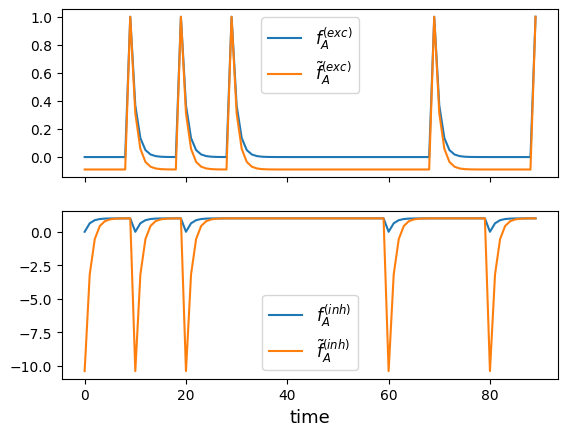

In [28]:
import matplotlib.pyplot as plt
A_index=[9,19,29,69,89]
B_index=[10,20,30,60,80]

f_A, f_A_tilde, S_AB=S_AB_exc(A_index,B_index,1)

fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True)
ax1, ax2 = axes.flatten()

ax1.plot(f_A,label=r"$f^{(exc)}_{A}$")
ax1.plot(f_A_tilde,label=r"$\tilde{f}^{(exc)}_{A}$")
# ax1_set.ylim([min(f_A_tilde)-0.05,1.05])
# plt.xlim([,x2+.2*x2])
# for i in B_index:
#     ax1.axvline(x=i,ymin=0.13, ymax=.95,color="g")
# ax1.axvline(i,ymin=0.13, ymax=.95, color="g",label=r"B")
ax1.legend(fontsize=12,loc='upper center')


B_index=[9,19,29,69,89]
A_index=[0,10,20,60,80]
f_A, f_A_tilde, S_AB=S_AB_inh(A_index,B_index,1)
ax2.plot(f_A,label=r"$f^{(inh)}_{A}$")
ax2.plot(f_A_tilde,label=r"$\tilde{f}^{(inh)}_{A}$")
# ax2.plt.ylim([min(f_A_tilde)-0.05,1.05])
# plt.xlim([,x2+.2*x2])
# for i in B_index:
#     ax2.axvline(x=i,ymin=0.13, ymax=.95,color="g")
# ax2.axvline(i,ymin=0.13, ymax=.95, color="g",label=r"B")
ax2.legend(fontsize=12,loc='lower center')
plt.xlabel('time', fontsize=13)
plt.savefig('/Users/msaeedia/figures/Brain_neurons/shematic/shematic_B.png')
plt.show()

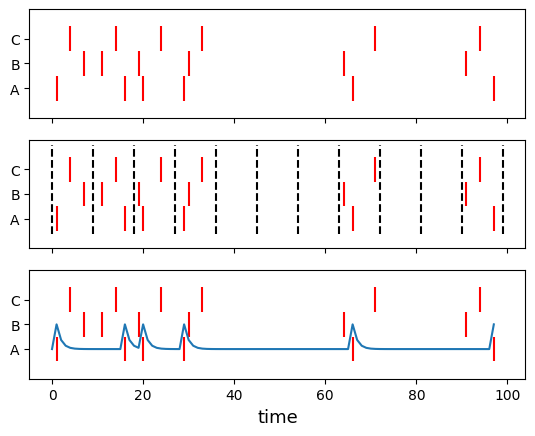

In [29]:
import matplotlib.pyplot as plt

Raster=[[1,16,20,29,66,97],[7,11,19,30,64,91],[4,14,24,33,71,94]]
A_index=[1,16,20,29,66,97]
B_index=[7,11,19,30,64,91]
f_A, f_A_tilde, S_AB=S_AB_exc(A_index,B_index,1)


fig, axes = plt.subplots(nrows=3, ncols=1, sharex=True)
ax1, ax2, ax3 = axes.flatten()

ax1.eventplot(Raster,color="r")
ax2.eventplot(Raster,color="r")
ax3.eventplot(Raster,color="r")
# ax1.eventplot(B_index,color='r')
# ax1.legend(fontsize=12,loc='upper center')
for i in range(0, 100, 9):
    ax2.axvline(x=i,ymin=0.13, ymax=.95,linestyle='--',color="k")
#     ax3.axvline(x=i,ymin=0.13, ymax=.95,linestyle='--',color="k")
# # ax2.axvline(i,ymin=0.13, ymax=.95, color="g",label=r"B")
# ax2.legend(fontsize=12,loc='upper center')
y_ticks_labels = ['A','B','C']
ax1.set_yticks([0,1,2])
ax1.set_yticklabels(y_ticks_labels, fontsize=10)
ax2.set_yticks([0,1,2])
ax2.set_yticklabels(y_ticks_labels, fontsize=10)
ax3.set_yticks([0,1,2])
ax3.set_yticklabels(y_ticks_labels, fontsize=10)
plt.xlabel('time', fontsize=13)
ax3.plot(f_A)
plt.savefig('/Users/msaeedia/figures/Brain_neurons/shematic/shematic_A.png')
plt.show()